In [115]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Loading the RGB image
image = cv2.imread('img.png',1)

#Displaying the image
cv2.imshow ('Title of the window', image)
cv2.waitKey(1)

#Loading the RGB image
image2 = cv2.imread('img2.png',1)

#Displaying the image
cv2.imshow ('Title of the window', image2)
cv2.waitKey(1)



-1

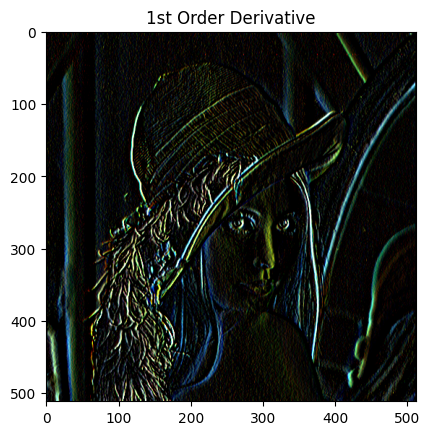

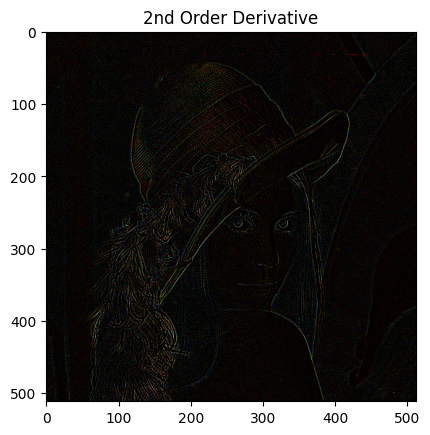

In [29]:
#Question NO_1

sobel = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

laplacian = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])

first_order = cv2.filter2D(image, -1, sobel)
second_order = cv2.filter2D(image, -1, laplacian)


plt.imshow(first_order, cmap='gray'), plt.title('1st Order Derivative')
plt.show()

plt.imshow(second_order, cmap='gray'), plt.title('2nd Order Derivative')
plt.show()

Image may contain noise.
The noise is likely salt and pepper.


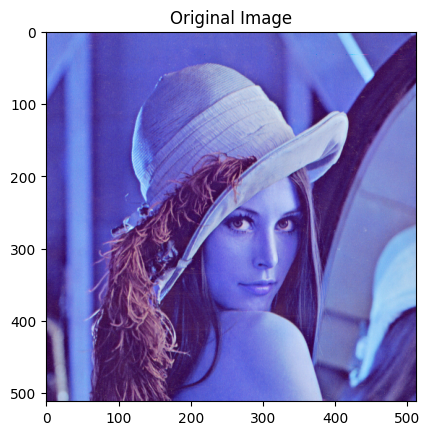

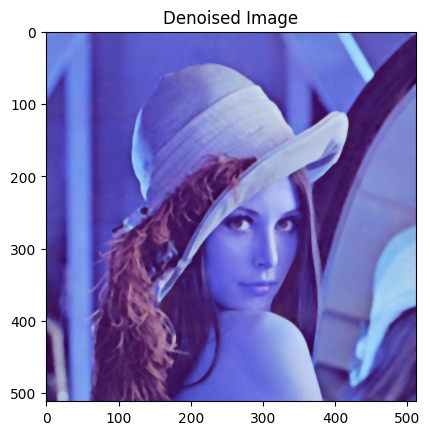

In [59]:
#Question NO_2

mean_intensity = np.mean(image)
std_deviation = np.std(image)

noise_threshold = 30  
gaussian_threshold = 50 
salt_and_pepper_threshold = 100  

if std_deviation > noise_threshold:
    print("Image may contain noise.")
    
    if std_deviation < gaussian_threshold:
        print("The noise is likely Gaussian.")
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    else:
        print("The noise is likely salt and pepper.")
        denoised_image = cv2.medianBlur(image, 5)

    plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.show()
    plt.imshow(denoised_image, cmap='gray'), plt.title('Denoised Image')
    plt.show()

else:
    print("Image likely has low noise or no noticeable noise.")

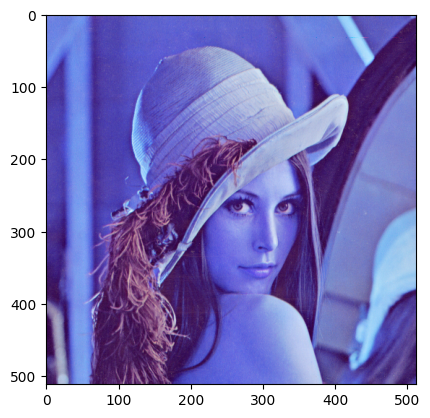

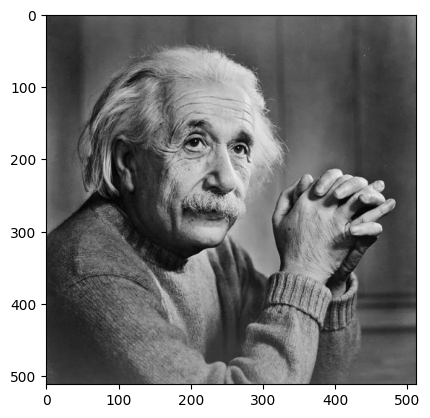

In [98]:
#Question No_3

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

if image.shape != image2.shape:
    image2 = cv2.resize((image.shape[1], image.shape[0]))

    features1 = image.flatten()
    features2 = image2.flatten()

    X = np.vstack((features1, features2))
    y = np.array([1, 0])  


    model = LogisticRegression()
    model.fit(X, y)

    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)

    plt.imshow(image, cmap='gray')
    plt.show()

    plt.imshow(image2, cmap='gray')
    plt.show()


In [85]:
print("Predictions : " , predictions)
print("ACcuracy : " , accuracy*100)

Predictions :  [1 0]
ACcuracy :  100.0


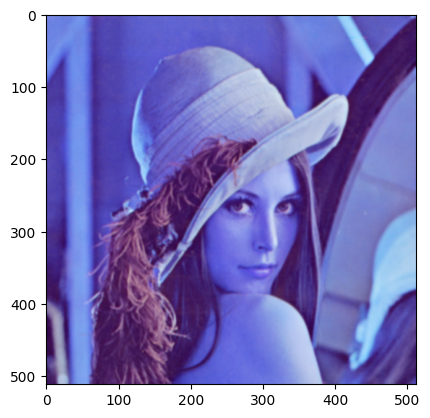

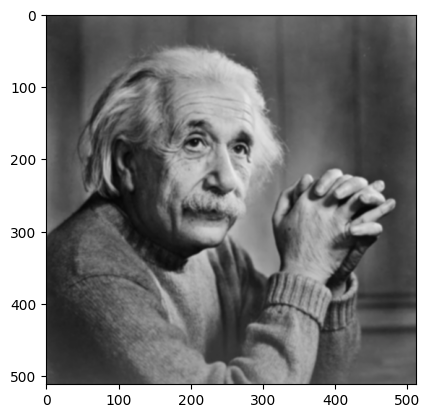

In [108]:
#Question No_4

if image.shape != image2.shape:
    image2 = cv2.resize(image2, (image.shape[1], image.shape[0]))

filtered_image1 = cv2.GaussianBlur(image, (5, 5), 0)
filtered_image2 = cv2.GaussianBlur(image2, (5, 5), 0)

labels = [0,1]


features1 = filtered_image1.flatten()
features2 = filtered_image2.flatten()

# Create a feature matrix and labels
X = np.vstack((features1, features2))
y = np.array(labels)


model = LogisticRegression()
model.fit(X, y)

predictions = model.predict(X)
accuracy = accuracy_score(y, predictions)

plt.imshow(filtered_image1, cmap='gray')
plt.show()

plt.imshow(filtered_image2, cmap='gray')
plt.show()

In [109]:
print(f'Predicted Labels: {predictions}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Predicted Labels: [0 1]
Accuracy: 100.00%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


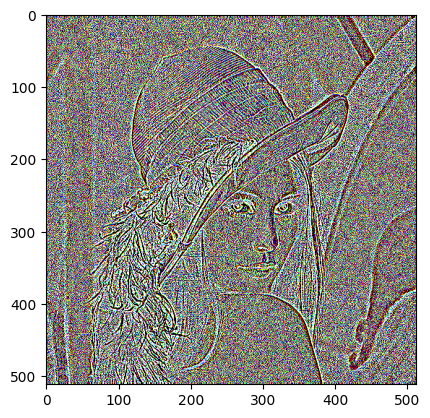

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


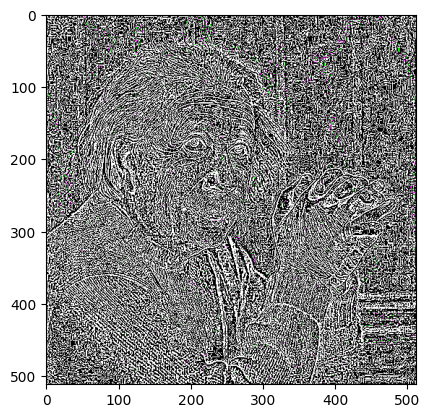

In [110]:
#Question No_5

labels = [0, 1] 

if image.shape != image2.shape:
    image2 = cv2.resize(image2, (image.shape[1], image.shape[0]))

filtered_image1 = cv2.Laplacian(image, cv2.CV_64F)
filtered_image2 = cv2.Laplacian(image2, cv2.CV_64F)

features1 = filtered_image1.flatten()
features2 = filtered_image2.flatten()

X = np.vstack((features1, features2))
y = np.array(labels)

model = LogisticRegression()
model.fit(X, y)

predictions = model.predict(X)
accuracy = accuracy_score(y, predictions)

plt.imshow(filtered_image1, cmap='gray')
plt.show()

plt.imshow(filtered_image2, cmap='gray')
plt.show()

In [111]:
print(f'Predicted Labels: {predictions}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Predicted Labels: [0 1]
Accuracy: 100.00%


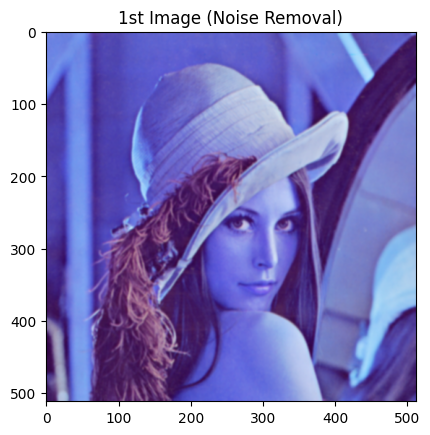

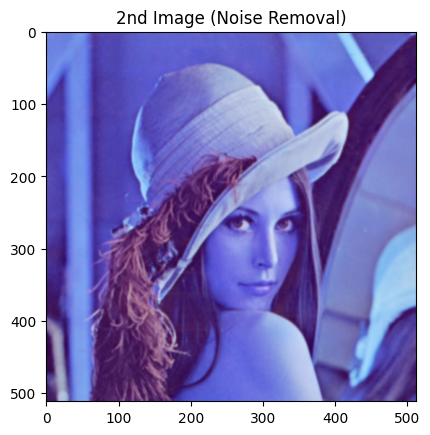

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


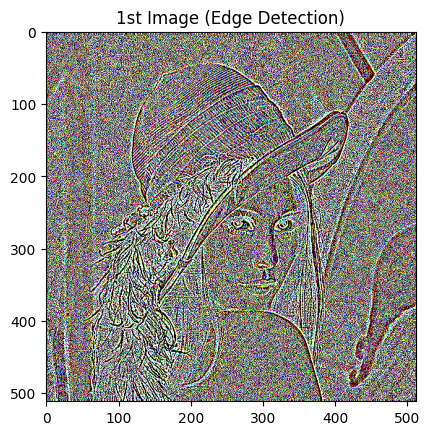

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


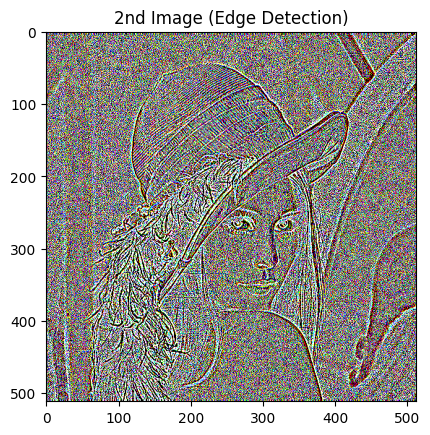

Predicted Labels: [0 0]
Accuracy: 50.00%


In [116]:
#Question No_6

if image.shape != image2.shape:
    image2 = cv2.resize(image2, (image.shape[1], image.shape[0]))


filtered_image1 = cv2.GaussianBlur(image, (5, 5), 0)
filtered_image2 = cv2.GaussianBlur(image, (5, 5), 0)


edge_image1 = cv2.Laplacian(image, cv2.CV_64F)
edge_image2 = cv2.Laplacian(image, cv2.CV_64F)

features1 = edge_image1.flatten()
features2 = edge_image2.flatten()


X = np.vstack((features1, features2))
y = np.array(labels)

model = LogisticRegression()
model.fit(X, y)

predictions = model.predict(X)
accuracy = accuracy_score(y, predictions)

plt.imshow(filtered_image1, cmap='gray')
plt.title('1st Image (Noise Removal)')
plt.show()

plt.imshow(filtered_image2, cmap='gray')
plt.title('2nd Image (Noise Removal)')
plt.show()

plt.imshow(edge_image1, cmap='gray')
plt.title('1st Image (Edge Detection)')
plt.show()

plt.imshow(edge_image2, cmap='gray')
plt.title('2nd Image (Edge Detection)')
plt.show()


print(f'Predicted Labels: {predictions}')
print(f'Accuracy: {accuracy * 100:.2f}%')
